<a href="https://colab.research.google.com/github/gopichand0416/Airbnb-booking-analysis/blob/main/Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.   
# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.   
**Explore and analyze the data to discover key understandings (not limited to these) such as :   
1.What can we learn about different hosts and areas?   
2.What can we learn from predictions? (ex: locations, prices, reviews, etc)   
3.Which hosts are the busiest and why?   
4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Attributes:-
**1.id**:- It gives individual id for every registered house.  
**2.name**:- It gives the name by the type of the house.  
**3.host_id**:- It gives individual id for each host of the respective house.  
**4.host_name**:- This gives name of host for the house.  
**5.neighbourhood_group**:- It gives the neighbourhood group where the house is located.  
**6.neighbourhood**:- It gives the place where the house is located.  
**7.latitude**:- It gives the latitude where the house is located.  
**8.longitude**:- It gives longitude of the house where it is located.  
**9.room_type**:- It gives us the type of the room.  
**10.price**:- It gives price of the house.  
**11.minimum_nights**:- It gives the minimum number of nights that the house would be available.  
**12.number_of_reviews**:- These is the number of reviews given for the house.  
**13.last_review**:- It gives last date when the review is given for the house lastly.  
**14.reviews_per_month**:- It is average for the given reviews per month.  
**15.calculated_host_listings_count**:- Number of hosts available for the house.  
**16.availability_365**:- It gives number of days the house is available for bookings in a year.  

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

from the above obtained output we observe that there 16names,21host_names, 10052last_review and reviews_per_month of nulls are present in our dataset no we will replace the values with necessary values for reducing errors.

In [ ]:
df['reviews_per_month'].fillna(0, inplace = True)

In [ ]:
df["last_review"].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:

top_host = df.host_name.value_counts().head(20)
top_host
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Hosts', 'host_name':'Listings'}, inplace=True)
top_host_df

,Hosts,Listings
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


[Text(0, 0, 'Michael'),
 Text(1, 0, 'David'),
 Text(2, 0, 'Sonder (NYC)'),
 Text(3, 0, 'John'),
 Text(4, 0, 'Alex'),
 Text(5, 0, 'Blueground'),
 Text(6, 0, 'Sarah'),
 Text(7, 0, 'Daniel'),
 Text(8, 0, 'Jessica'),
 Text(9, 0, 'Maria'),
 Text(10, 0, 'Mike'),
 Text(11, 0, 'Andrew'),
 Text(12, 0, 'Anna'),
 Text(13, 0, 'Chris'),
 Text(14, 0, 'Laura'),
 Text(15, 0, 'Melissa'),
 Text(16, 0, 'Emily'),
 Text(17, 0, 'Jennifer'),
 Text(18, 0, 'James'),
 Text(19, 0, 'Rachel')]

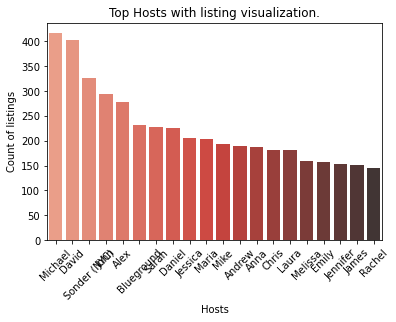

In [ ]:
var_1=sns.barplot(x="Hosts", y="Listings", data=top_host_df,
                 palette='Reds_d')
var_1.set_title('Top Hosts with listing visualization.')
var_1.set_ylabel('Count of listings')
var_1.set_xlabel('Hosts')
var_1.set_xticklabels(var_1.get_xticklabels(), rotation=45)

From the above obtained plot we observe that michael,david are having more number of houses.

In [ ]:
df1=df['neighbourhood_group'].value_counts()

<AxesSubplot:>

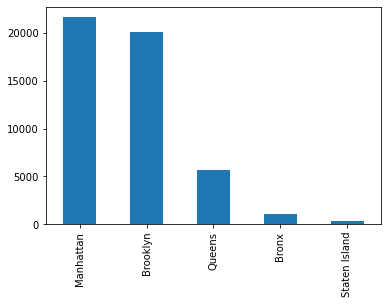

In [ ]:
df1.plot(kind='bar')

From the above obtained plot we can observe that manhattan and brooklyn neighbourhood groups are having more number of houses and manhattan is the more traffic area based on the neighbourhood_group.

In [ ]:

top_neighbourhood = df.neighbourhood.value_counts().head(20)
top_neighbourhood
top_neighbourhood_df=pd.DataFrame(top_neighbourhood)
top_neighbourhood_df.reset_index(inplace=True)
top_neighbourhood_df.rename(columns={'index':'Neighbourhoods', 'neighbourhood':'Listings'}, inplace=True)
top_neighbourhood_df

,Neighbourhoods,Listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown'),
 Text(10, 0, 'East Harlem'),
 Text(11, 0, 'Greenpoint'),
 Text(12, 0, 'Chelsea'),
 Text(13, 0, 'Lower East Side'),
 Text(14, 0, 'Astoria'),
 Text(15, 0, 'Washington Heights'),
 Text(16, 0, 'West Village'),
 Text(17, 0, 'Financial District'),
 Text(18, 0, 'Flatbush'),
 Text(19, 0, 'Clinton Hill')]

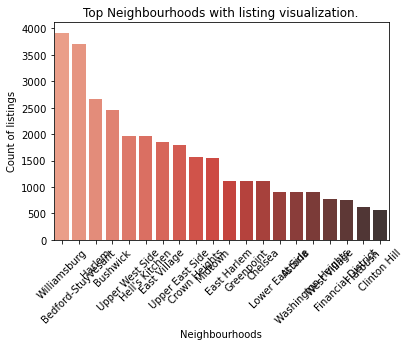

In [ ]:
var_2=sns.barplot(x="Neighbourhoods", y="Listings", data=top_neighbourhood_df,
                 palette='Reds_d')
var_2.set_title('Top Neighbourhoods with listing visualization.')
var_2.set_ylabel('Count of listings')
var_2.set_xlabel('Neighbourhoods')
var_2.set_xticklabels(var_2.get_xticklabels(), rotation=45)

From the above obtained neighbourhood plot we can observe that williamsburg is the most traffic area based on neighbourhood.

In [ ]:
df2=df['room_type'].value_counts()

<AxesSubplot:>

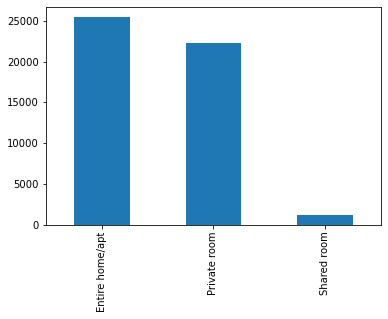

In [ ]:
df2.plot(kind='bar')

From the above obtained plot we can observe that there are more number of houses with entire home/apt are more compared to all other room types.

In [ ]:
df3=df['price'].value_counts().head(20)

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The maximum price value for the house is 10000.

<AxesSubplot:>

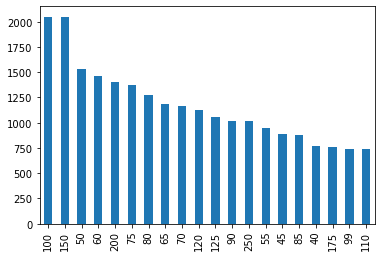

In [ ]:
df3.plot(kind='bar')

From the above obtained plot we can observe that there are more number of houses with price 100,150. 

In [ ]:
df4=df['minimum_nights'].value_counts().head(10)

<AxesSubplot:>

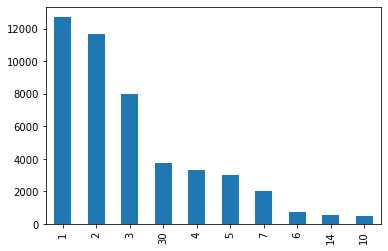

In [ ]:
df4.plot(kind='bar')

From the above obtained plot we can observe that there are more number of houses which are available for 1 or 2 nights only.

In [ ]:
df5=df['availability_365'].value_counts().head(10)

<AxesSubplot:>

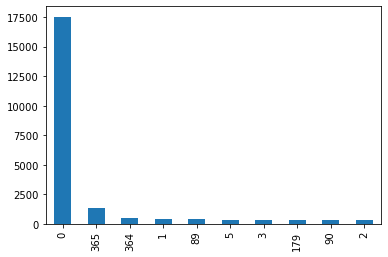

In [ ]:
df5.plot(kind='bar')

Based upon above obtained plot we can observe that there are more number of houses which are available for 0 days for booking which means we can assume that there are more number of houses which are unable to say availability of house in a year.

In [ ]:
df6=df['calculated_host_listings_count'].value_counts().head(10)

<AxesSubplot:>

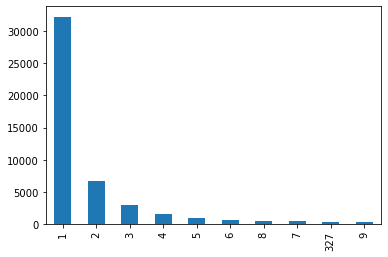

In [ ]:
df6.plot(kind='bar')

From the above obtained plot we can observe there are many number of houses which are having only 1 or 2 hosts for the house.

In [ ]:
# Lets dive deeper into neighbourhood groups presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

# Brooklyn
elem_1 = df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_elem1 = elem_1[['price']]

# Manhattan
elem_2 = df.loc[df['neighbourhood_group'] == 'Manhattan']
price_elem2 = elem_2[['price']]

# Queens
elem_3 = df.loc[df['neighbourhood_group'] == 'Queens']
price_elem3 = elem_3[['price']]

# Staten Island
elem_4 = df.loc[df['neighbourhood_group'] == 'Staten Island']
price_elem4 = elem_4[['price']]

# Bronx
elem_5 = df.loc[df['neighbourhood_group'] == 'Bronx']
price_elem5 = elem_5[['price']]

# Getting all prices listed in a list
price_list = [price_elem1, price_elem2, price_elem3, price_elem4, price_elem5]

In [ ]:
# Creating an empty list and then appending it for each neighbourhood_group.
empty_list = []

# List with the data of the neighbourhood_group columns.
neighbours_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Getting a loop to get statistics iterating for price ranges and append it to our empty list.
for char in price_list:
    x=char.describe(percentiles=[.25, .50, .75])
    x=x.iloc[3:]
    x.reset_index(inplace=True)
    x.rename(columns={'index':'Stats'}, inplace=True)
    empty_list.append(x)

# Modifying names of the price column to the area name for easier readability of the table.   
empty_list[0].rename(columns={'price':neighbours_list[0]}, inplace=True)
empty_list[1].rename(columns={'price':neighbours_list[1]}, inplace=True)
empty_list[2].rename(columns={'price':neighbours_list[2]}, inplace=True)
empty_list[3].rename(columns={'price':neighbours_list[3]}, inplace=True)
empty_list[4].rename(columns={'price':neighbours_list[4]}, inplace=True)

#finilizing our dataframe for final view    
stat_df = empty_list
stat_df = [df1.set_index('Stats') for df1 in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density & Distribution of prices according to each Neighbourhood Group')

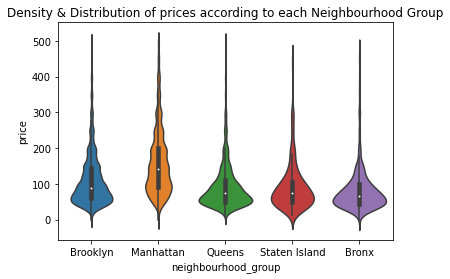

In [ ]:
# For the sake of better visualization, we need to remove extreme values.

# Creating a sub-dataframe with no extreme values / less than 500

sub_df = df[df.price < 500]

# Getting violinplot to showcase density and distribtuion of prices.

var_3 = sns.violinplot(data = sub_df, x='neighbourhood_group', y='price')
var_3.set_title('Density & Distribution of prices according to each Neighbourhood Group')

From the above obtained plot and statistics we can observe the values of price based on the neighbourhood group. 

Text(0, 0.5, 'Mean price')

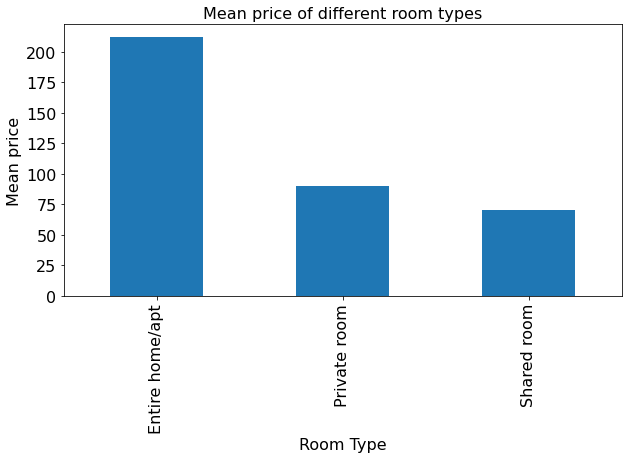

In [ ]:
#Mean price of the room types
a=df.groupby(['room_type'])['price'].mean().plot.bar(figsize = (10,5),fontsize = 16)
a.set_title('Mean price of different room types', fontsize = 16)
a.set_xlabel('Room Type',fontsize = 16)
a.set_ylabel('Mean price', fontsize =16)

From the above obtained plot for price based on the room type we can get idea that entire home/apt is having more price compared to other room types.so that we can get an idea that there are more number of houses with high price by comparing the room types.

Text(0.5, 1.0, 'Number of reviews per neighbourhood')

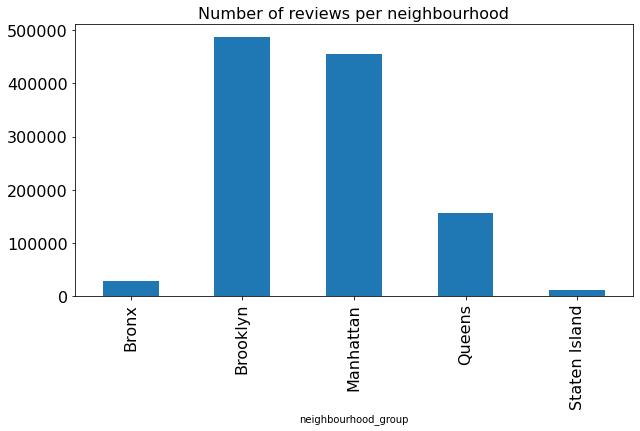

In [ ]:
bx = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().plot.bar (
    figsize = (10,5),
    fontsize = 16
)

bx.set_title("Number of reviews per neighbourhood", fontsize = 16)

Based on the above obtained plot based on reviews and neighbourhood we can observe that brooklyn neighbourhood group is having more reviews compared to other neighbourhood groups.

Text(0, 0.5, 'Availability 365')

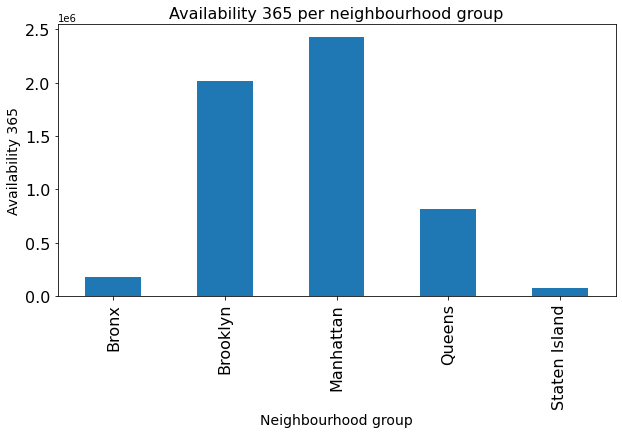

In [ ]:
cx = df.groupby(['neighbourhood_group'])['availability_365'].sum().plot.bar (
    figsize = (10,5),
    fontsize = 16
)

cx.set_title("Availability 365 per neighbourhood group", fontsize = 16)
cx.set_xlabel('Neighbourhood group',fontsize = 14)
cx.set_ylabel('Availability 365',fontsize = 14)

Based on the number of days availability in the year manhattan is having more number of houses which are available for more number of days compared to other neighbourhood groups.

In [ ]:
room_preferrence_by_area=df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack()

<AxesSubplot:xlabel='neighbourhood_group'>

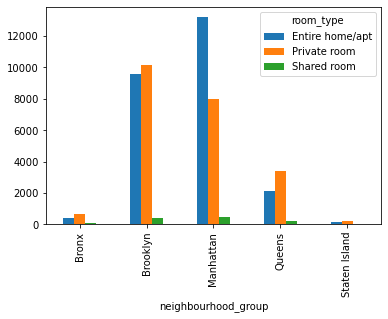

In [ ]:
room_preferrence_by_area.plot(kind='bar')

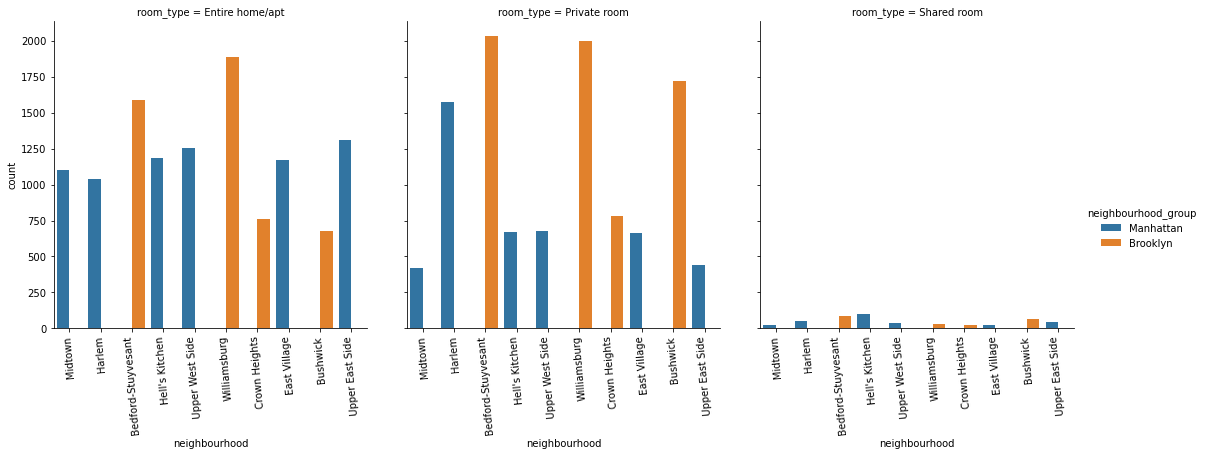

In [ ]:
# Combining the top neighbourhood data with room type for a better visualization of demand. 

# Getting the top 10 neighbourhood as a sub-dataframe
sub_dataframe = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

# Implementing catplot to represent multiple interesting attributes together and a count.
var_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data = sub_dataframe, kind = 'count')
var_3.set_xticklabels(rotation=95)

From the above obtained plots we can observe that by plotting the neighboorhoods for manhattan and brooklyn which are more traffic neighboorhood groups based on room type we can observe the traffic of room types at that particular neighboorhoods.

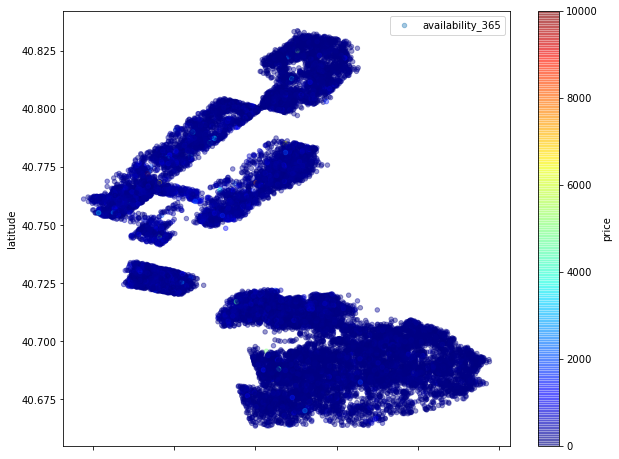

In [ ]:
# Calculating the above data with the latitute and longitude values on the sub-dataframe along with price.

var_4=sub_dataframe.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
var_4.legend()

Based on the above obtained geoplot we can get idea of the availability of houses in manhattan and brooklyn neighboorhood groups 

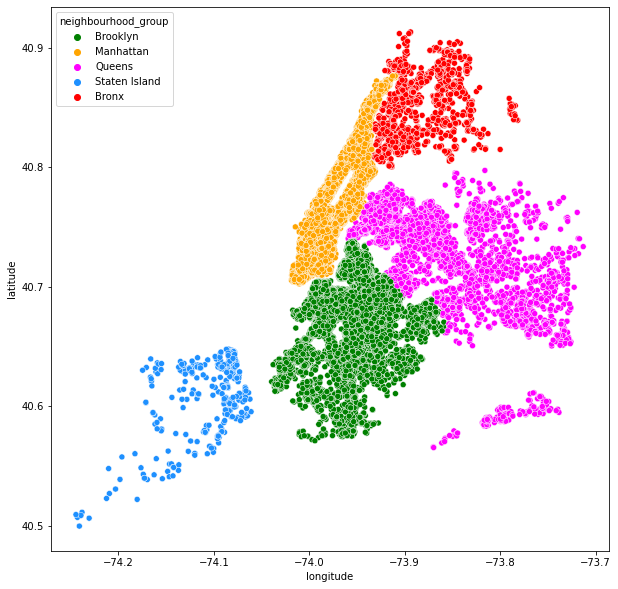

In [ ]:
plt.figure(figsize=(10,10))
ng =sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['green','orange','magenta','dodgerblue','red'], legend='full',data=df)


From the above obtained scatterplot we can observe the areas based on latitude and longitude.

# Summary:-

Based on our analysis we would summarize the project with following points:
 1. Micheal and david are having more number of houses compared to other hosts.
 2. Based on the neighbourhood williamsburg is the most busiest area.
 3. Based on the neighbourhood region manhattan is the most busiest neighbourhood group.
 4. Based on the price and roomtypes we can get idea there are more number of houses with more price.
 5. There are more number of houses which are available for 1 or 2 nights only so that we can assume that there are more number of houses which will be available for weekends only.
 6. There are more number of houses which are having more reviews from brooklyn and manhattan neighboorhood groups.
 7. Based on the analysis we can observe that availability_365 column is not playing any role because there are more number of houses which are available for 0 days so that we can get idea that there are more number of houses which are unable to give the particular days for its availabilty.